# Scikit web. Optimal separating hyperplane using an SVC for classes that are unbalanced.

La complejidad se ajuste es más que cuadrática, con lo que el número de muestras hace que sea difícil de escalar un dataset con más de 10000 muestras.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn import svm

In [4]:
rng = np.random.RandomState(0)

In [5]:
n_samples_1 = 1000

In [6]:
n_samples_2 = 100

In [7]:
X = np.r_[1.5 * rng.randn(n_samples_1, 2), 0.5 * rng.randn(n_samples_2, 2) + [2, 2]]

In [8]:
y = [0] * (n_samples_1) + [1] * (n_samples_2)

In [9]:
clf = svm.SVC(kernel='linear', C=1.0)

get the separating hyperplane

In [10]:
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

get the separating hyperplane using weighted classes

In [11]:
wclf = svm.SVC(kernel='linear', class_weight={1: 10})

In [12]:
wclf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight={1: 10}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

In [14]:
plt.legend()

C:\utils\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [15]:
ax = plt.gca()

In [16]:
xlim = ax.get_xlim()

In [17]:
ylim = ax.get_ylim()

In [18]:
xx = np.linspace(xlim[0], xlim[1], 30)

In [19]:
yy = np.linspace(ylim[0], ylim[1], 30)

In [20]:
YY, XX = np.meshgrid(yy, xx)

In [21]:
xy = np.vstack([XX.ravel(), YY.ravel()]).T

In [22]:
Z = clf.decision_function(xy).reshape(XX.shape)

In [23]:
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

In [24]:
Z = wclf.decision_function(xy).reshape(XX.shape)

In [25]:
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

In [26]:
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"], loc="upper right")

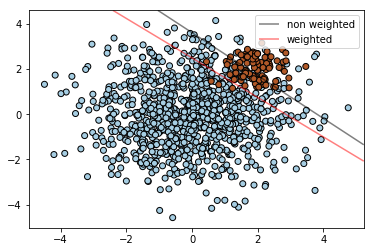

In [27]:
plt.show()